In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
import os
import numpy as np
dpi = 200

workdir = '/Users/diana/Dropbox/UW/Research/rasm/project_prep/'

import data

In [3]:
rasm11_output = xr.open_dataset(os.path.join(workdir, 'rasm_data_atm', 'fluxes.1948-09-01.nc'))
rasm10_output = xr.open_dataset(os.path.join(workdir, 'rasm_1.0', 'rasm_10_vic_fluxes_091948-081949.nc'))

In [4]:
rasm10_output.TMask.min()

<xarray.DataArray 'TMask' ()>
array(0, dtype=int32)

In [5]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
rasm11_output_months = rasm11_output.groupby('time.month').mean('time')
rasm10_output_months = rasm10_output.groupby('time.month').mean('time')

In [6]:
rasm10_output_seasons = rasm10_output.groupby('time.season').mean('time')
rasm11_output_seasons = rasm11_output.groupby('time.season').mean('time')

In [7]:
rasm10_output_seasons.season.values

array(['DJF', 'JJA', 'MAM', 'SON'], dtype=object)

In [8]:
ncfiles = {}
ncfiles['rasm_domain'] = '/Users/diana/Dropbox/UW/Research/rasm/domain.lnd.wr50a_ar9v4.100920.nc'
ncfiles['rasm_masks'] = '/Users/diana/Dropbox/UW/Research/rasm/RASM_VICRVIC_GRID_MASKS_AND_METRICS.nc'

ncdata = {}
ncdata['rasm_domain'] = xr.open_dataset(ncfiles['rasm_domain'])
ncdata['rasm_masks'] = xr.open_dataset(ncfiles['rasm_masks'])

In [9]:
from rasmlib.analysis.plotting import make_bmap, projections, sub_plot_pcolor
# Setup rasmlib plotting
wr50a_map = make_bmap(projection=projections['wr50a'],
                      lons=ncdata['rasm_domain']['xc'].values,
                      lats=ncdata['rasm_domain']['yc'].values)
ncdata['rasm_masks'] = xr.open_dataset(ncfiles['rasm_masks'])
spatial_plot_mask = ncdata['rasm_masks']['mask_active_land'].values < 0.9

In [10]:
def draw_map(lw=0.3):
    wr50a_map.m.drawmapboundary(fill_color=(0.9, 0.9, 0.9))
    wr50a_map.m.fillcontinents(color='white', zorder=0)
    wr50a_map.m.drawparallels(np.arange(-80., 81., 20.), linewidth=lw)
    wr50a_map.m.drawmeridians(np.arange(-180., 181., 20.), linewidth=lw)
    wr50a_map.m.drawcoastlines(color='k', linewidth=lw)

RASM 1.1 runoff

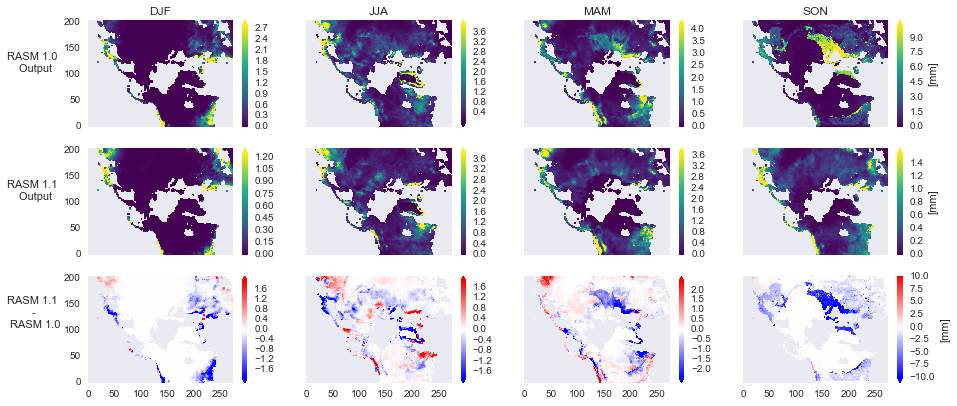

In [28]:
fig, axs = plt.subplots(3,4, figsize=(15, 6.5))
lp = 30
seasons = ['DJF', 'JJA', 'MAM', 'SON']
for i, axes in enumerate(axs.ravel()): 
    if i  < 8:
        axes.xaxis.set_ticklabels([])
    if i != 0 and i != 4 and i != 8:
        axes.yaxis.set_ticklabels([])
    if i == 0:
        axes.set_ylabel('RASM 1.0 \n Output', rotation='horizontal', labelpad=lp)
    elif i == 4: 
        axes.set_ylabel('RASM 1.1 \n Output', rotation='horizontal', labelpad=lp)
    elif i == 8: 
        axes.set_ylabel('RASM 1.1 \n - \n RASM 1.0', rotation='horizontal', labelpad=lp)
    if i < 4: 
        axes.set_title(seasons[i])
    # draw map 
    # draw_map()
    if i < 4: 
        output_precip = rasm10_output_seasons['Runoff'].sel(season=seasons[i]).where(rasm10_output.TMask == 1)
        output_precip.plot(cmap='viridis', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[mm]'} if i == 3 else None, 
                           robust=True)
    elif i >= 4 and i < 8: 
        rasm_11 = rasm11_output_seasons['OUT_RUNOFF'].sel(season=seasons[i-4])
        rasm_11.plot(cmap='viridis', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[mm]'} if i == 7 else None, 
                           robust=True)
    else: 
        rasm10 = rasm10_output_seasons['Runoff'].sel(season=seasons[i-8])
        rasm11 = rasm11_output_seasons['OUT_RUNOFF'].sel(season=seasons[i-8])
        difference = rasm11 - rasm10.to_masked_array()
        difference.plot(cmap='bwr', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[mm]'} if i == 11 else None, 
                           robust=True)
plotname = 'runoff_rasm10_minus_rasm_11.png'
plot_direc = os.path.join(workdir, 'plots', 'project_meeting_presentation')
if not os.path.exists(plot_direc):
    os.makedirs(plot_direc)
savepath = os.path.join(plot_direc, plotname)
plt.savefig(savepath, format='png', dpi=dpi, bbox_inches='tight')

In [ ]:
fig, axs = plt.subplots(3,12, figsize=(35, 6.5))
lp = 30
for i, axes in enumerate(axs.ravel()): 
    if i  < 24:
        axes.xaxis.set_ticklabels([])
    if i != 0 and i != 12 and i != 24:
        axes.yaxis.set_ticklabels([])
    if i == 0:
        axes.set_ylabel('RASM 1.0 \n Output', rotation='horizontal', labelpad=lp)
    elif i == 12: 
        axes.set_ylabel('RASM 1.1 \n Output', rotation='horizontal', labelpad=lp)
    elif i == 24: 
        axes.set_ylabel('RASM 1.1 \n - \n RASM \n 1.0', rotation='horizontal', labelpad=lp)
    if i < 12: 
        axes.set_title(months[i])
    if i < 12: 
        output_precip = rasm10_output_months['Runoff'].isel(month=i).where(rasm10_output.TMask == 1)
        output_precip.plot(cmap='viridis', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[mm]'} if i == 23 else None, 
                           robust=True)
    elif i >= 12 and i < 24: 
        lh_coupled = rasm11_output_months['OUT_RUNOFF'].isel(month=i-12)
        lh_coupled.plot(cmap='viridis', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[mm]'} if i == 11 else None, 
                           robust=True)
    else: 
        rasm10 = rasm10_output_months['Runoff'].isel(month=i-24)
        rasm11 = rasm11_output_months['OUT_RUNOFF'].isel(month=i-24)
        difference = rasm11 - rasm10.to_masked_array()
        difference.plot(cmap='bwr', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[mm]'} if i == 35 else None, 
                           robust=True)
plotname = 'runoff_rasm10_minus_rasm_11.png'
plot_direc = os.path.join(workdir, 'plots')
if not os.path.exists(plot_direc):
    os.makedirs(plot_direc)
savepath = os.path.join(plot_direc, plotname)
plt.savefig(savepath, format='png', dpi=dpi, bbox_inches='tight')

RASM 1.0: Baseflow

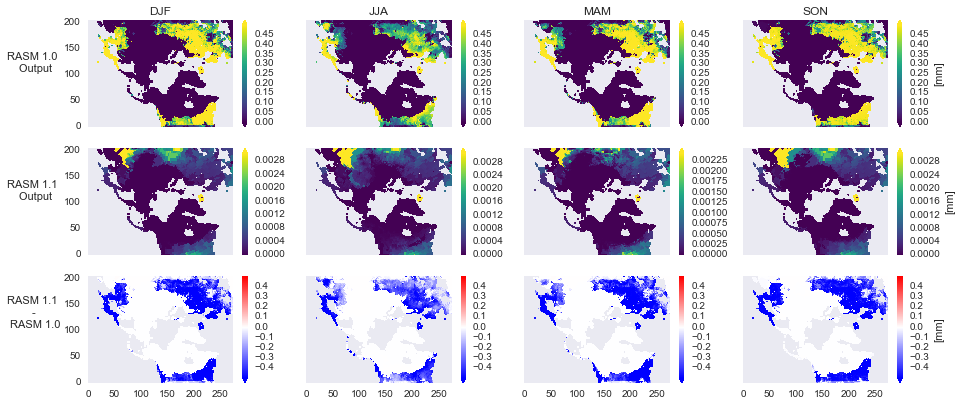

In [29]:
fig, axs = plt.subplots(3,4, figsize=(15, 6.5))
lp = 30
seasons = ['DJF', 'JJA', 'MAM', 'SON']
for i, axes in enumerate(axs.ravel()): 
    if i  < 8:
        axes.xaxis.set_ticklabels([])
    if i != 0 and i != 4 and i != 8:
        axes.yaxis.set_ticklabels([])
    if i == 0:
        axes.set_ylabel('RASM 1.0 \n Output', rotation='horizontal', labelpad=lp)
    elif i == 4: 
        axes.set_ylabel('RASM 1.1 \n Output', rotation='horizontal', labelpad=lp)
    elif i == 8: 
        axes.set_ylabel('RASM 1.1 \n - \n RASM 1.0', rotation='horizontal', labelpad=lp)
    if i < 4: 
        axes.set_title(seasons[i])
    # draw map 
    # draw_map()
    if i < 4: 
        output_precip = rasm10_output_seasons['Baseflow'].sel(season=seasons[i]).where(rasm10_output.TMask == 1)
        output_precip.plot(cmap='viridis', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[mm]'} if i == 3 else None, 
                           robust=True)
    elif i >= 4 and i < 8: 
        rasm_11 = rasm11_output_seasons['OUT_BASEFLOW'].sel(season=seasons[i-4])
        rasm_11.plot(cmap='viridis', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[mm]'} if i == 7 else None, 
                           robust=True)
    else: 
        rasm10 = rasm10_output_seasons['Baseflow'].sel(season=seasons[i-8])
        rasm11 = rasm11_output_seasons['OUT_BASEFLOW'].sel(season=seasons[i-8])
        difference = rasm11 - rasm10.to_masked_array()
        difference.plot(cmap='bwr', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[mm]'} if i == 11 else None, 
                           robust=True)
plotname = 'baseflow_rasm10_minus_rasm_11.png'
plot_direc = os.path.join(workdir, 'plots', 'project_meeting_presentation')
if not os.path.exists(plot_direc):
    os.makedirs(plot_direc)
savepath = os.path.join(plot_direc, plotname)
plt.savefig(savepath, format='png', dpi=dpi, bbox_inches='tight')

In [ ]:
fig, axs = plt.subplots(3,12, figsize=(35, 6.5))
lp = 30
for i, axes in enumerate(axs.ravel()): 
    if i  < 24:
        axes.xaxis.set_ticklabels([])
    if i != 0 and i != 12 and i != 24:
        axes.yaxis.set_ticklabels([])
    if i == 0:
        axes.set_ylabel('RASM 1.0 \n Output', rotation='horizontal', labelpad=lp)
    elif i == 12: 
        axes.set_ylabel('RASM 1.1 \n Output', rotation='horizontal', labelpad=lp)
    elif i == 24: 
        axes.set_ylabel('RASM 1.1 \n - \n RASM \n 1.0', rotation='horizontal', labelpad=lp)
    if i < 12: 
        axes.set_title(months[i])
    if i < 12: 
        output_precip = rasm10_output_months['Baseflow'].isel(month=i).where(rasm10_output.TMask == 1)
        output_precip.plot(cmap='viridis', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[mm]'} if i == 11 else None, 
                           robust=True)
    elif i >= 12 and i < 24: 
        lh_coupled = rasm11_output_months['OUT_BASEFLOW'].isel(month=i-12)
        lh_coupled.plot(cmap='viridis', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[mm]'} if i == 23 else None, 
                           robust=True)
    else: 
        rasm10 = rasm10_output_months['Baseflow'].isel(month=i-24)
        rasm11 = rasm11_output_months['OUT_BASEFLOW'].isel(month=i-24)
        difference = rasm11 - rasm10.to_masked_array()
        difference.plot(cmap='bwr', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[mm]'} if i == 35 else None, 
                           robust=True)
plotname = 'baseflow_rasm10_minus_rasm_11.png'
plot_direc = os.path.join(workdir, 'plots')
if not os.path.exists(plot_direc):
    os.makedirs(plot_direc)
savepath = os.path.join(plot_direc, plotname)
plt.savefig(savepath, format='png', dpi=dpi, bbox_inches='tight')

RASM 1.0: Soil Temp, First Layer

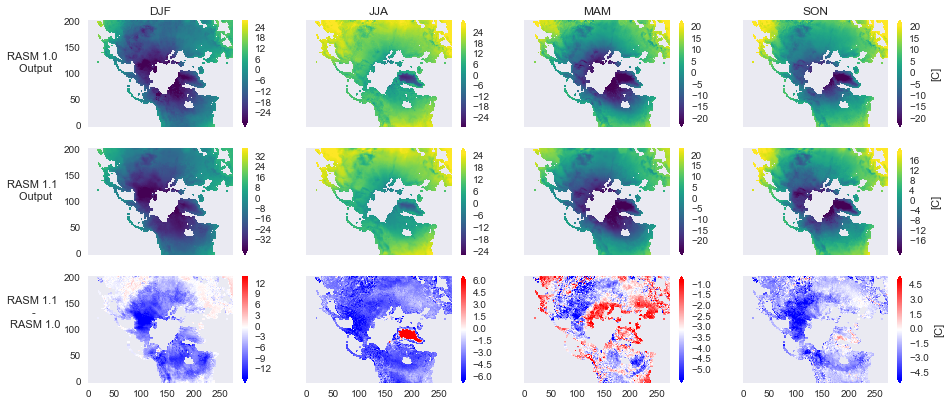

In [30]:
fig, axs = plt.subplots(3,4, figsize=(15, 6.5))
layer = 0
lp = 30
seasons = ['DJF', 'JJA', 'MAM', 'SON']
for i, axes in enumerate(axs.ravel()): 
    if i  < 8:
        axes.xaxis.set_ticklabels([])
    if i != 0 and i != 4 and i != 8:
        axes.yaxis.set_ticklabels([])
    if i == 0:
        axes.set_ylabel('RASM 1.0 \n Output', rotation='horizontal', labelpad=lp)
    elif i == 4: 
        axes.set_ylabel('RASM 1.1 \n Output', rotation='horizontal', labelpad=lp)
    elif i == 8: 
        axes.set_ylabel('RASM 1.1 \n - \n RASM 1.0', rotation='horizontal', labelpad=lp)
    if i < 4: 
        axes.set_title(seasons[i])
    # draw map 
    # draw_map()
    if i < 4: 
        output_precip = rasm10_output_seasons['Tsoil'].sel(season=seasons[i]).sel(depth=layer).where(rasm10_output.TMask == 1)
        output_precip.plot(cmap='viridis', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[C]'} if i == 3 else None, 
                           robust=True)
    elif i >= 4 and i < 8: 
        rasm_11 = rasm11_output_seasons['OUT_SOIL_TEMP'].sel(season=seasons[i-4]).sel(nlayer=layer)
        rasm_11.plot(cmap='viridis', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[C]'} if i == 7 else None, 
                           robust=True)
    else: 
        rasm10 = rasm10_output_seasons['Tsoil'].sel(season=seasons[i-8]).sel(depth=layer)
        rasm11 = rasm11_output_seasons['OUT_SOIL_TEMP'].sel(season=seasons[i-8]).sel(nlayer=layer)
        difference = rasm11 - rasm10.to_masked_array()
        difference.plot(cmap='bwr', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[C]'} if i == 11 else None, 
                           robust=True)
plotname = 'soiltemp_layer%s_rasm11_minus_rasm_10.png' % str(layer)
plot_direc = os.path.join(workdir, 'plots', 'project_meeting_presentation')
if not os.path.exists(plot_direc):
    os.makedirs(plot_direc)
savepath = os.path.join(plot_direc, plotname)
plt.savefig(savepath, format='png', dpi=dpi, bbox_inches='tight')

In [ ]:
fig, axs = plt.subplots(3,12, figsize=(35, 6.5))
layer = 0
lp = 30
for i, axes in enumerate(axs.ravel()): 
    if i  < 24:
        axes.xaxis.set_ticklabels([])
    if i != 0 and i != 12 and i != 24:
        axes.yaxis.set_ticklabels([])
    if i == 0:
        axes.set_ylabel('RASM 1.0 \n Output', rotation='horizontal', labelpad=lp)
    elif i == 12: 
        axes.set_ylabel('RASM 1.1 \n Output', rotation='horizontal', labelpad=lp)
    elif i == 24: 
        axes.set_ylabel('RASM 1.1 \n - \n RASM \n 1.0', rotation='horizontal', labelpad=lp)
    if i < 12: 
        axes.set_title(months[i])
    if i < 12: 
        output_precip = rasm10_output_months['Tsoil'].isel(month=i).sel(depth=layer).where(rasm10_output.TMask == 1)
        output_precip.plot(cmap='viridis', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[C]'} if i == 11 else None, 
                           robust=True)
    elif i >= 12 and i < 24: 
        lh_coupled = rasm11_output_months['OUT_SOIL_TEMP'].isel(month=i-12).sel(nlayer=layer)
        lh_coupled.plot(cmap='viridis', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[C]'} if i == 23 else None, 
                           robust=True)
    else: 
        rasm10 = rasm10_output_months['Tsoil'].isel(month=i-24).sel(depth=layer)
        rasm11 = rasm11_output_months['OUT_SOIL_TEMP'].isel(month=i-24).sel(nlayer=layer)
        difference = rasm11 - rasm10.to_masked_array()
        difference.plot(cmap='bwr', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[C]'} if i == 35 else None, 
                           robust=True)
plotname = 'soiltemp_layer%s_rasm11_minus_rasm_10.png' % str(layer)
plot_direc = os.path.join(workdir, 'plots')
if not os.path.exists(plot_direc):
    os.makedirs(plot_direc)
savepath = os.path.join(plot_direc, plotname)
plt.savefig(savepath, format='png', dpi=dpi, bbox_inches='tight')

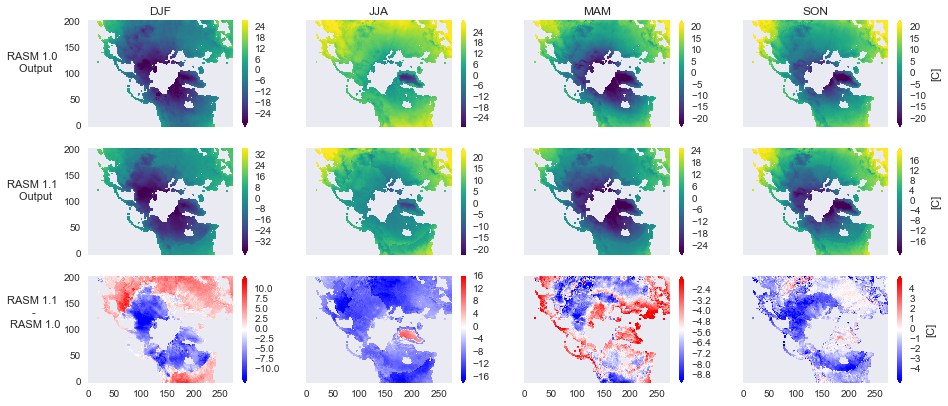

In [31]:
fig, axs = plt.subplots(3,4, figsize=(15, 6.5))
layer = 1
lp = 30
seasons = ['DJF', 'JJA', 'MAM', 'SON']
for i, axes in enumerate(axs.ravel()): 
    if i  < 8:
        axes.xaxis.set_ticklabels([])
    if i != 0 and i != 4 and i != 8:
        axes.yaxis.set_ticklabels([])
    if i == 0:
        axes.set_ylabel('RASM 1.0 \n Output', rotation='horizontal', labelpad=lp)
    elif i == 4: 
        axes.set_ylabel('RASM 1.1 \n Output', rotation='horizontal', labelpad=lp)
    elif i == 8: 
        axes.set_ylabel('RASM 1.1 \n - \n RASM 1.0', rotation='horizontal', labelpad=lp)
    if i < 4: 
        axes.set_title(seasons[i])
    # draw map 
    # draw_map()
    if i < 4: 
        output_precip = rasm10_output_seasons['Tsoil'].sel(season=seasons[i]).sel(depth=layer).where(rasm10_output.TMask == 1)
        output_precip.plot(cmap='viridis', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[C]'} if i == 3 else None, 
                           robust=True)
    elif i >= 4 and i < 8: 
        rasm_11 = rasm11_output_seasons['OUT_SOIL_TEMP'].sel(season=seasons[i-4]).sel(nlayer=layer)
        rasm_11.plot(cmap='viridis', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[C]'} if i == 7 else None, 
                           robust=True)
    else: 
        rasm10 = rasm10_output_seasons['Tsoil'].sel(season=seasons[i-8]).sel(depth=layer)
        rasm11 = rasm11_output_seasons['OUT_SOIL_TEMP'].sel(season=seasons[i-8]).sel(nlayer=layer)
        difference = rasm11 - rasm10.to_masked_array()
        difference.plot(cmap='bwr', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[C]'} if i == 11 else None, 
                           robust=True)
plotname = 'soiltemp_layer%s_rasm11_minus_rasm_10.png' % str(layer)
plot_direc = os.path.join(workdir, 'plots', 'project_meeting_presentation')
if not os.path.exists(plot_direc):
    os.makedirs(plot_direc)
savepath = os.path.join(plot_direc, plotname)
plt.savefig(savepath, format='png', dpi=dpi, bbox_inches='tight')

In [ ]:
fig, axs = plt.subplots(3,12, figsize=(35, 6.5))
layer = 1
lp = 30
for i, axes in enumerate(axs.ravel()): 
    if i  < 24:
        axes.xaxis.set_ticklabels([])
    if i != 0 and i != 12 and i != 24:
        axes.yaxis.set_ticklabels([])
    if i == 0:
        axes.set_ylabel('RASM 1.0 \n Output', rotation='horizontal', labelpad=lp)
    elif i == 12: 
        axes.set_ylabel('RASM 1.1 \n Output', rotation='horizontal', labelpad=lp)
    elif i == 24: 
        axes.set_ylabel('RASM 1.1 \n - \n RASM \n 1.0', rotation='horizontal', labelpad=lp)
    if i < 12: 
        axes.set_title(months[i])
    if i < 12: 
        output_precip = rasm10_output_months['Tsoil'].isel(month=i).sel(depth=layer).where(rasm10_output.TMask == 1)
        output_precip.plot(cmap='viridis', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[C]'} if i == 11 else None, 
                           robust=True)
    elif i >= 12 and i < 24: 
        lh_coupled = rasm11_output_months['OUT_SOIL_TEMP'].isel(month=i-12).sel(nlayer=layer)
        lh_coupled.plot(cmap='viridis', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[C]'} if i == 23 else None, 
                           robust=True)
    else: 
        rasm10 = rasm10_output_months['Tsoil'].isel(month=i-24).sel(depth=layer)
        rasm11 = rasm11_output_months['OUT_SOIL_TEMP'].isel(month=i-24).sel(nlayer=layer)
        difference = rasm11 - rasm10.to_masked_array()
        difference.plot(cmap='bwr', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[C]'} if i == 35 else None, 
                           robust=True)
plotname = 'soiltemp_layer%s_rasm11_minus_rasm_10.png' % str(layer)
plot_direc = os.path.join(workdir, 'plots')
if not os.path.exists(plot_direc):
    os.makedirs(plot_direc)
savepath = os.path.join(plot_direc, plotname)
plt.savefig(savepath, format='png', dpi=dpi, bbox_inches='tight')

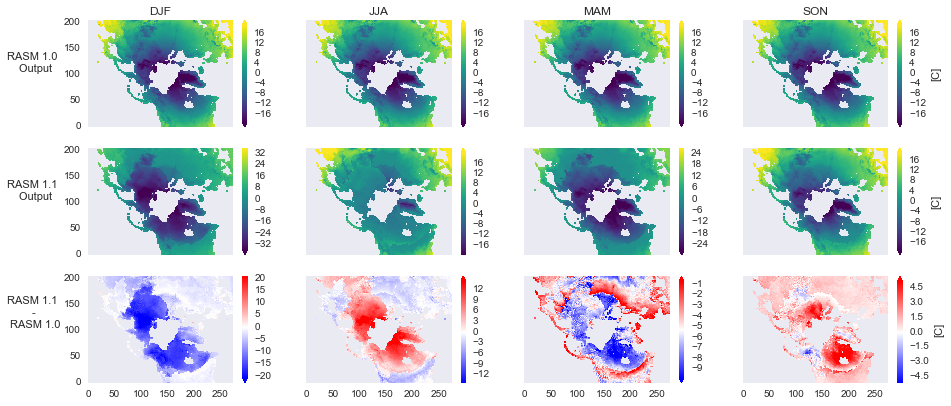

In [32]:
fig, axs = plt.subplots(3,4, figsize=(15, 6.5))
layer = 2
lp = 30
seasons = ['DJF', 'JJA', 'MAM', 'SON']
for i, axes in enumerate(axs.ravel()): 
    if i  < 8:
        axes.xaxis.set_ticklabels([])
    if i != 0 and i != 4 and i != 8:
        axes.yaxis.set_ticklabels([])
    if i == 0:
        axes.set_ylabel('RASM 1.0 \n Output', rotation='horizontal', labelpad=lp)
    elif i == 4: 
        axes.set_ylabel('RASM 1.1 \n Output', rotation='horizontal', labelpad=lp)
    elif i == 8: 
        axes.set_ylabel('RASM 1.1 \n - \n RASM 1.0', rotation='horizontal', labelpad=lp)
    if i < 4: 
        axes.set_title(seasons[i])
    # draw map 
    # draw_map()
    if i < 4: 
        output_precip = rasm10_output_seasons['Tsoil'].sel(season=seasons[i]).sel(depth=layer).where(rasm10_output.TMask == 1)
        output_precip.plot(cmap='viridis', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[C]'} if i == 3 else None, 
                           robust=True)
    elif i >= 4 and i < 8: 
        rasm_11 = rasm11_output_seasons['OUT_SOIL_TEMP'].sel(season=seasons[i-4]).sel(nlayer=layer)
        rasm_11.plot(cmap='viridis', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[C]'} if i == 7 else None, 
                           robust=True)
    else: 
        rasm10 = rasm10_output_seasons['Tsoil'].sel(season=seasons[i-8]).sel(depth=layer)
        rasm11 = rasm11_output_seasons['OUT_SOIL_TEMP'].sel(season=seasons[i-8]).sel(nlayer=layer)
        difference = rasm11 - rasm10.to_masked_array()
        difference.plot(cmap='bwr', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[C]'} if i == 11 else None, 
                           robust=True)
plotname = 'soiltemp_layer%s_rasm11_minus_rasm_10.png' % str(layer)
plot_direc = os.path.join(workdir, 'plots', 'project_meeting_presentation')
if not os.path.exists(plot_direc):
    os.makedirs(plot_direc)
savepath = os.path.join(plot_direc, plotname)
plt.savefig(savepath, format='png', dpi=dpi, bbox_inches='tight')

In [ ]:
fig, axs = plt.subplots(3,12, figsize=(35, 6.5))
layer = 2
lp = 30
for i, axes in enumerate(axs.ravel()): 
    if i  < 24:
        axes.xaxis.set_ticklabels([])
    if i != 0 and i != 12 and i != 24:
        axes.yaxis.set_ticklabels([])
    if i == 0:
        axes.set_ylabel('RASM 1.0 \n Output', rotation='horizontal', labelpad=lp)
    elif i == 12: 
        axes.set_ylabel('RASM 1.1 \n Output', rotation='horizontal', labelpad=lp)
    elif i == 24: 
        axes.set_ylabel('RASM 1.1 \n - \n RASM \n 1.0', rotation='horizontal', labelpad=lp)
    if i < 12: 
        axes.set_title(months[i])
    if i < 12: 
        output_precip = rasm10_output_months['Tsoil'].isel(month=i).sel(depth=layer).where(rasm10_output.TMask == 1)
        output_precip.plot(cmap='viridis', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[C]'} if i == 11 else None, 
                           robust=True)
    elif i >= 12 and i < 24: 
        lh_coupled = rasm11_output_months['OUT_SOIL_TEMP'].isel(month=i-12).sel(nlayer=layer)
        lh_coupled.plot(cmap='viridis', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[C]'} if i == 23 else None, 
                           robust=True)
    else: 
        rasm10 = rasm10_output_months['Tsoil'].isel(month=i-24).sel(depth=layer)
        rasm11 = rasm11_output_months['OUT_SOIL_TEMP'].isel(month=i-24).sel(nlayer=layer)
        difference = rasm11 - rasm10.to_masked_array()
        difference.plot(cmap='bwr', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[C]'} if i == 35 else None, 
                           robust=True)
plotname = 'soiltemp_layer%s_rasm11_minus_rasm_10.png' % str(layer)
plot_direc = os.path.join(workdir, 'plots')
if not os.path.exists(plot_direc):
    os.makedirs(plot_direc)
savepath = os.path.join(plot_direc, plotname)
plt.savefig(savepath, format='png', dpi=dpi, bbox_inches='tight')

Precipitation

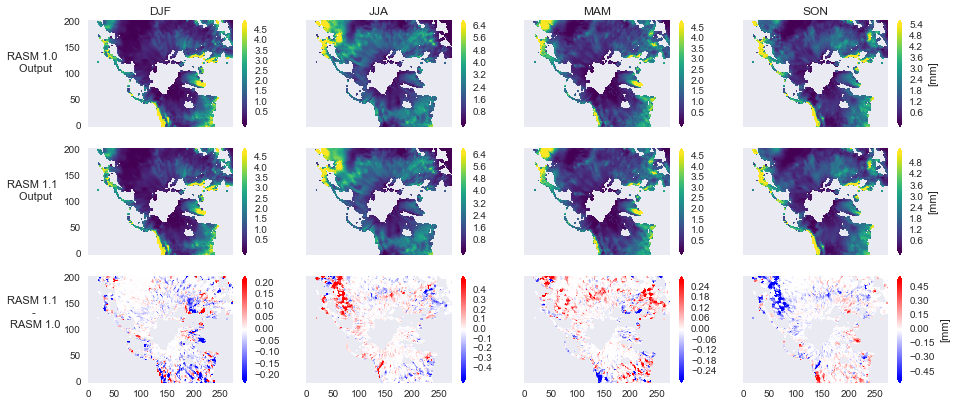

In [33]:
fig, axs = plt.subplots(3,4, figsize=(15, 6.5))
lp = 30
seasons = ['DJF', 'JJA', 'MAM', 'SON']
for i, axes in enumerate(axs.ravel()): 
    if i  < 8:
        axes.xaxis.set_ticklabels([])
    if i != 0 and i != 4 and i != 8:
        axes.yaxis.set_ticklabels([])
    if i == 0:
        axes.set_ylabel('RASM 1.0 \n Output', rotation='horizontal', labelpad=lp)
    elif i == 4: 
        axes.set_ylabel('RASM 1.1 \n Output', rotation='horizontal', labelpad=lp)
    elif i == 8: 
        axes.set_ylabel('RASM 1.1 \n - \n RASM 1.0', rotation='horizontal', labelpad=lp)
    if i < 4: 
        axes.set_title(seasons[i])
    # draw map 
    # draw_map()
    if i < 4: 
        output_precip = rasm10_output_seasons['Precipitation'].sel(season=seasons[i]).where(rasm10_output.TMask == 1)
        output_precip.plot(cmap='viridis', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[mm]'} if i == 3 else None, 
                           robust=True)
    elif i >= 4 and i < 8: 
        rasm_11 = rasm11_output_seasons['OUT_PREC'].sel(season=seasons[i-4])
        rasm_11.plot(cmap='viridis', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[mm]'} if i == 7 else None, 
                           robust=True)
    else: 
        rasm10 = rasm10_output_seasons['Precipitation'].sel(season=seasons[i-8])
        rasm11 = rasm11_output_seasons['OUT_PREC'].sel(season=seasons[i-8])
        difference = rasm11 - rasm10.to_masked_array()
        difference.plot(cmap='bwr', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[mm]'} if i == 11 else None, 
                           robust=True)
plotname = 'precipitation_rasm10_minus_rasm_11.png'
plot_direc = os.path.join(workdir, 'plots', 'project_meeting_presentation')
if not os.path.exists(plot_direc):
    os.makedirs(plot_direc)
savepath = os.path.join(plot_direc, plotname)
plt.savefig(savepath, format='png', dpi=dpi, bbox_inches='tight')

In [ ]:
fig, axs = plt.subplots(3,12, figsize=(35, 6.5))
lp = 30
for i, axes in enumerate(axs.ravel()): 
    if i  < 24:
        axes.xaxis.set_ticklabels([])
    if i != 0 and i != 12 and i != 24:
        axes.yaxis.set_ticklabels([])
    if i == 0:
        axes.set_ylabel('RASM 1.0 \n Output', rotation='horizontal', labelpad=lp)
    elif i == 12: 
        axes.set_ylabel('RASM 1.1 \n Output', rotation='horizontal', labelpad=lp)
    elif i == 24: 
        axes.set_ylabel('RASM 1.1 \n - \n RASM \n 1.0', rotation='horizontal', labelpad=lp)
    if i < 12: 
        axes.set_title(months[i])
    if i < 12: 
        output_precip = rasm10_output_months['Precipitation'].isel(month=i).where(rasm10_output.TMask == 1)
        output_precip.plot(cmap='viridis', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[mm]'} if i == 23 else None, 
                           robust=True)
    elif i >= 12 and i < 24: 
        lh_coupled = rasm11_output_months['OUT_PREC'].isel(month=i-12)
        lh_coupled.plot(cmap='viridis', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[mm]'} if i == 11 else None, 
                           robust=True)
    else: 
        rasm10 = rasm10_output_months['Precipitation'].isel(month=i-24)
        rasm11 = rasm11_output_months['OUT_PREC'].isel(month=i-24)
        difference = rasm11 - rasm10.to_masked_array()
        difference.plot(cmap='bwr', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[mm]'} if i == 35 else None, 
                           robust=True)
plotname = 'precipitation_rasm10_minus_rasm_11.png'
plot_direc = os.path.join(workdir, 'plots')
if not os.path.exists(plot_direc):
    os.makedirs(plot_direc)
savepath = os.path.join(plot_direc, plotname)
plt.savefig(savepath, format='png', dpi=dpi, bbox_inches='tight')

Longwave Radiation

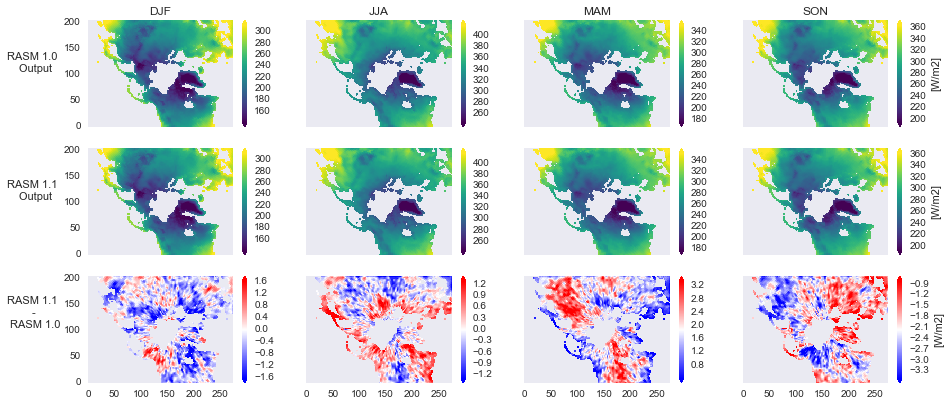

In [34]:
fig, axs = plt.subplots(3,4, figsize=(15, 6.5))
lp = 30
seasons = ['DJF', 'JJA', 'MAM', 'SON']
for i, axes in enumerate(axs.ravel()): 
    if i  < 8:
        axes.xaxis.set_ticklabels([])
    if i != 0 and i != 4 and i != 8:
        axes.yaxis.set_ticklabels([])
    if i == 0:
        axes.set_ylabel('RASM 1.0 \n Output', rotation='horizontal', labelpad=lp)
    elif i == 4: 
        axes.set_ylabel('RASM 1.1 \n Output', rotation='horizontal', labelpad=lp)
    elif i == 8: 
        axes.set_ylabel('RASM 1.1 \n - \n RASM 1.0', rotation='horizontal', labelpad=lp)
    if i < 4: 
        axes.set_title(seasons[i])
    # draw map 
    # draw_map()
    if i < 4: 
        output_precip = rasm10_output_seasons['Lwin'].sel(season=seasons[i]).where(rasm10_output.TMask == 1)
        output_precip.plot(cmap='viridis', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[W/m2]'} if i == 3 else None, 
                           robust=True)
    elif i >= 4 and i < 8: 
        rasm_11 = rasm11_output_seasons['OUT_LWDOWN'].sel(season=seasons[i-4])
        rasm_11.plot(cmap='viridis', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[W/m2]'} if i == 7 else None, 
                           robust=True)
    else: 
        rasm10 = rasm10_output_seasons['Lwin'].sel(season=seasons[i-8])
        rasm11 = rasm11_output_seasons['OUT_LWDOWN'].sel(season=seasons[i-8])
        difference = rasm11 - rasm10.to_masked_array()
        difference.plot(cmap='bwr', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[W/m2]'} if i == 11 else None, 
                           robust=True)
plotname = 'longwave_rasm10_minus_rasm_11.png'
plot_direc = os.path.join(workdir, 'plots', 'project_meeting_presentation')
if not os.path.exists(plot_direc):
    os.makedirs(plot_direc)
savepath = os.path.join(plot_direc, plotname)
plt.savefig(savepath, format='png', dpi=dpi, bbox_inches='tight')

In [ ]:
fig, axs = plt.subplots(3,12, figsize=(35, 6.5))
lp = 30
for i, axes in enumerate(axs.ravel()): 
    if i  < 24:
        axes.xaxis.set_ticklabels([])
    if i != 0 and i != 12 and i != 24:
        axes.yaxis.set_ticklabels([])
    if i == 0:
        axes.set_ylabel('RASM 1.0 \n Output', rotation='horizontal', labelpad=lp)
    elif i == 12: 
        axes.set_ylabel('RASM 1.1 \n Output', rotation='horizontal', labelpad=lp)
    elif i == 24: 
        axes.set_ylabel('RASM 1.1 \n - \n RASM 1.0', rotation='horizontal', labelpad=lp)
    if i < 12: 
        axes.set_title(months[i])
    if i < 12: 
        output_precip = rasm10_output_months['Lwin'].isel(month=i).where(rasm10_output.TMask == 1)
        output_precip.plot(cmap='viridis', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[W/m2]'} if i == 23 else None, 
                           robust=True)
    elif i >= 12 and i < 24: 
        lh_coupled = rasm11_output_months['OUT_LWDOWN'].isel(month=i-12)
        lh_coupled.plot(cmap='viridis', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[W/m2]'} if i == 11 else None, 
                           robust=True)
    else: 
        rasm10 = rasm10_output_months['Lwin'].isel(month=i-24)
        rasm11 = rasm11_output_months['OUT_LWDOWN'].isel(month=i-24)
        difference = rasm11 - rasm10.to_masked_array()
        difference.plot(cmap='bwr', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[W/m2]'} if i == 35 else None, 
                           robust=True)
plotname = 'LW_rasm10_minus_rasm_11.png'
plot_direc = os.path.join(workdir, 'plots')
if not os.path.exists(plot_direc):
    os.makedirs(plot_direc)
savepath = os.path.join(plot_direc, plotname)
plt.savefig(savepath, format='png', dpi=dpi, bbox_inches='tight')

Albedo

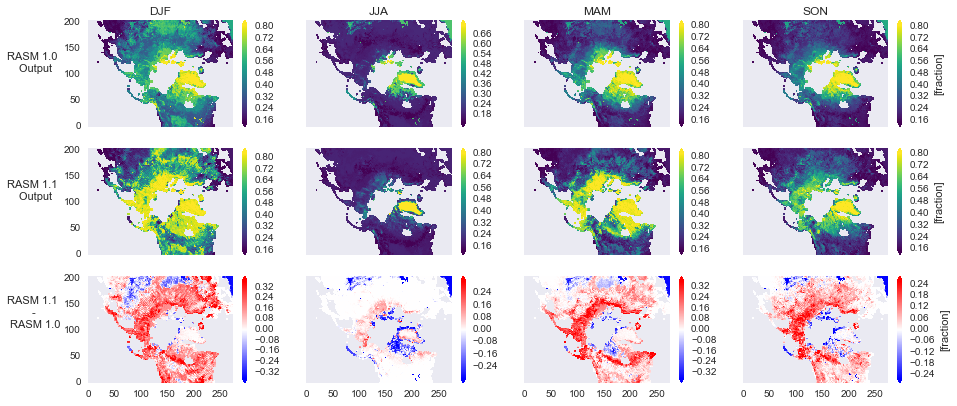

In [35]:
fig, axs = plt.subplots(3,4, figsize=(15, 6.5))
lp = 30
seasons = ['DJF', 'JJA', 'MAM', 'SON']
for i, axes in enumerate(axs.ravel()): 
    if i  < 8:
        axes.xaxis.set_ticklabels([])
    if i != 0 and i != 4 and i != 8:
        axes.yaxis.set_ticklabels([])
    if i == 0:
        axes.set_ylabel('RASM 1.0 \n Output', rotation='horizontal', labelpad=lp)
    elif i == 4: 
        axes.set_ylabel('RASM 1.1 \n Output', rotation='horizontal', labelpad=lp)
    elif i == 8: 
        axes.set_ylabel('RASM 1.1 \n - \n RASM 1.0', rotation='horizontal', labelpad=lp)
    if i < 4: 
        axes.set_title(seasons[i])
    # draw map 
    # draw_map()
    if i < 4: 
        output_precip = rasm10_output_seasons['Albedo'].sel(season=seasons[i]).where(rasm10_output.TMask == 1)
        output_precip.plot(cmap='viridis', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[fraction]'} if i == 3 else None, 
                           robust=True)
    elif i >= 4 and i < 8: 
        rasm_11 = rasm11_output_seasons['OUT_ALBEDO'].sel(season=seasons[i-4])
        rasm_11.plot(cmap='viridis', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[fraction]'} if i == 7 else None, 
                           robust=True)
    else: 
        rasm10 = rasm10_output_seasons['Albedo'].sel(season=seasons[i-8])
        rasm11 = rasm11_output_seasons['OUT_ALBEDO'].sel(season=seasons[i-8])
        difference = rasm11 - rasm10.to_masked_array()
        difference.plot(cmap='bwr', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[fraction]'} if i == 11 else None, 
                           robust=True)
plotname = 'albedo_rasm10_minus_rasm_11.png'
plot_direc = os.path.join(workdir, 'plots', 'project_meeting_presentation')
if not os.path.exists(plot_direc):
    os.makedirs(plot_direc)
savepath = os.path.join(plot_direc, plotname)
plt.savefig(savepath, format='png', dpi=dpi, bbox_inches='tight')

In [ ]:
fig, axs = plt.subplots(3,12, figsize=(35, 6.5))
lp = 30
for i, axes in enumerate(axs.ravel()): 
    if i  < 24:
        axes.xaxis.set_ticklabels([])
    if i != 0 and i != 12 and i != 24:
        axes.yaxis.set_ticklabels([])
    if i == 0:
        axes.set_ylabel('RASM 1.0 \n Output', rotation='horizontal', labelpad=lp)
    elif i == 12: 
        axes.set_ylabel('RASM 1.1 \n Output', rotation='horizontal', labelpad=lp)
    elif i == 24: 
        axes.set_ylabel('RASM 1.1 \n - \n RASM 1.0', rotation='horizontal', labelpad=lp)
    if i < 12: 
        axes.set_title(months[i])
    if i < 12: 
        output_precip = rasm10_output_months['Albedo'].isel(month=i).where(rasm10_output.TMask == 1)
        output_precip.plot(cmap='viridis', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '(fraction)'} if i == 23 else None, 
                           robust=True)
    elif i >= 12 and i < 24: 
        lh_coupled = rasm11_output_months['OUT_ALBEDO'].isel(month=i-12)
        lh_coupled.plot(cmap='viridis', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '(fraction)'} if i == 11 else None, 
                           robust=True)
    else: 
        rasm10 = rasm10_output_months['Albedo'].isel(month=i-24)
        rasm11 = rasm11_output_months['OUT_ALBEDO'].isel(month=i-24)
        difference = rasm11 - rasm10.to_masked_array()
        difference.plot(cmap='bwr', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '(fraction)'} if i == 35 else None, 
                           robust=True)
plotname = 'albedo_rasm10_minus_rasm_11.png'
plot_direc = os.path.join(workdir, 'plots')
if not os.path.exists(plot_direc):
    os.makedirs(plot_direc)
savepath = os.path.join(plot_direc, plotname)
plt.savefig(savepath, format='png', dpi=dpi, bbox_inches='tight')

Evaporation

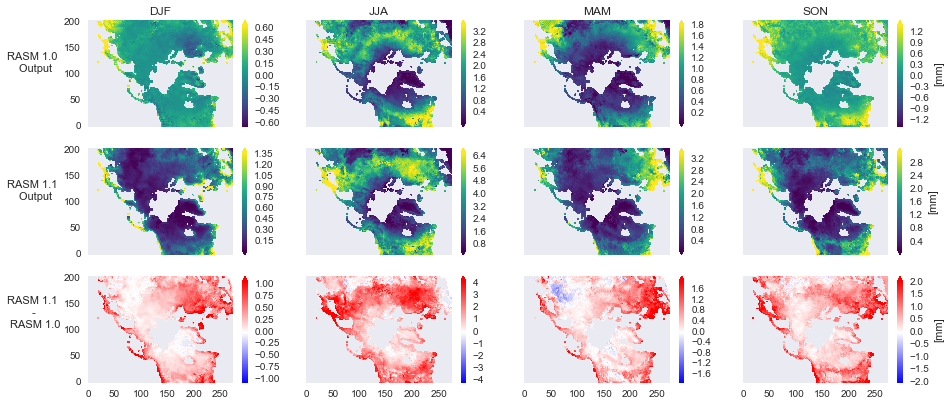

In [38]:
fig, axs = plt.subplots(3,4, figsize=(15, 6.5))
lp = 30
seasons = ['DJF', 'JJA', 'MAM', 'SON']
for i, axes in enumerate(axs.ravel()): 
    if i  < 8:
        axes.xaxis.set_ticklabels([])
    if i != 0 and i != 4 and i != 8:
        axes.yaxis.set_ticklabels([])
    if i == 0:
        axes.set_ylabel('RASM 1.0 \n Output', rotation='horizontal', labelpad=lp)
    elif i == 4: 
        axes.set_ylabel('RASM 1.1 \n Output', rotation='horizontal', labelpad=lp)
    elif i == 8: 
        axes.set_ylabel('RASM 1.1 \n - \n RASM 1.0', rotation='horizontal', labelpad=lp)
    if i < 4: 
        axes.set_title(seasons[i])
    # draw map 
    # draw_map()
    if i < 4: 
        output_precip = rasm10_output_seasons['Evap'].sel(season=seasons[i]).where(rasm10_output.TMask == 1)
        output_precip.plot(cmap='viridis', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[mm]'} if i == 3 else None, 
                           robust=True)
    elif i >= 4 and i < 8: 
        rasm_11 = rasm11_output_seasons['OUT_EVAP'].sel(season=seasons[i-4])
        rasm_11.plot(cmap='viridis', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[mm]'} if i == 7 else None, 
                           robust=True)
    else: 
        rasm10 = rasm10_output_seasons['Evap'].sel(season=seasons[i-8])
        rasm11 = rasm11_output_seasons['OUT_EVAP'].sel(season=seasons[i-8])
        difference = rasm11 - rasm10.to_masked_array()
        difference.plot(cmap='bwr', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[mm]'} if i == 11 else None, 
                           robust=True)
plotname = 'evaporation_rasm10_minus_rasm_11.png'
plot_direc = os.path.join(workdir, 'plots', 'project_meeting_presentation')
if not os.path.exists(plot_direc):
    os.makedirs(plot_direc)
savepath = os.path.join(plot_direc, plotname)
plt.savefig(savepath, format='png', dpi=dpi, bbox_inches='tight')

In [ ]:
fig, axs = plt.subplots(3,12, figsize=(35, 6.5))
lp = 30
for i, axes in enumerate(axs.ravel()): 
    if i  < 24:
        axes.xaxis.set_ticklabels([])
    if i != 0 and i != 12 and i != 24:
        axes.yaxis.set_ticklabels([])
    if i == 0:
        axes.set_ylabel('RASM 1.0 \n Output', rotation='horizontal', labelpad=lp)
    elif i == 12: 
        axes.set_ylabel('RASM 1.1 \n Output', rotation='horizontal', labelpad=lp)
    elif i == 24: 
        axes.set_ylabel('RASM 1.1 \n - \n RASM 1.0', rotation='horizontal', labelpad=lp)
    if i < 12: 
        axes.set_title(months[i])
    if i < 12: 
        output_precip = rasm10_output_months['Evap'].isel(month=i).where(rasm10_output.TMask == 1)
        output_precip.plot(cmap='viridis', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[mm]'} if i == 23 else None, 
                           robust=True)
    elif i >= 12 and i < 24: 
        lh_coupled = rasm11_output_months['OUT_EVAP'].isel(month=i-12)
        lh_coupled.plot(cmap='viridis', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[mm]'} if i == 11 else None, 
                           robust=True)
    else: 
        rasm10 = rasm10_output_months['Evap'].isel(month=i-24)
        rasm11 = rasm11_output_months['OUT_EVAP'].isel(month=i-24)
        difference = rasm11 - rasm10.to_masked_array()
        difference.plot(cmap='bwr', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[mm]'} if i == 35 else None, 
                           robust=True)
plotname = 'evap_rasm10_minus_rasm_11.png'
plot_direc = os.path.join(workdir, 'plots')
if not os.path.exists(plot_direc):
    os.makedirs(plot_direc)
savepath = os.path.join(plot_direc, plotname)
plt.savefig(savepath, format='png', dpi=dpi, bbox_inches='tight')